In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from statsmodels.tools.eval_measures import rmse

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
# statistics
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

In [3]:
uber_fare_df= pd.read_csv('uber.csv')
uber_fare_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
uber_fare_df_1= uber_fare_df.drop(['Unnamed: 0','key'],axis=1) # key and Unnamed ID seems to have no impact on our study

In [5]:
#study how many missing data are there ?
uber_fare_df_1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
#since there are 2 values which are missing , we can remove it ....
uber_fare_df_1.dropna(axis=0,inplace=True)
uber_fare_df_1

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
#splitting up the date (pickup date) to extract meaningful datas

#extract the time out of date and bin it to the morning, afternoon, evening, night
uber_fare_df_1['pickup_datetime'] = pd.to_datetime(uber_fare_df_1.pickup_datetime,utc=True)

In [8]:
uber_fare_df_1['pickup_timehour']= uber_fare_df_1['pickup_datetime'].apply(lambda x: x.hour)
uber_fare_df_1['Day']= uber_fare_df_1['pickup_datetime'].dt.day_name()
uber_fare_df_1['Day Part']= pd.cut(uber_fare_df_1['pickup_timehour'],bins=[-1,4,12,17,21,23],labels=['Night','Morning','Afternoon','Evening','Night'],ordered=False)
uber_fare_df_1['pickup_month']= uber_fare_df_1['pickup_datetime'].apply(lambda x: x.month)
uber_fare_df_1['pickup_year']= uber_fare_df_1['pickup_datetime'].apply(lambda x: x.year)

In [9]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
#from geopy.geocoders import Nominatim
#import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
#create a function for distance calculation between the two locations latitudes and logitudes
from math import radians, cos, sin, asin, sqrt
def calculate_distance(lat1, lat2, lon1, lon2):

	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)

	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))

	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371

	# calculate the result
	return(c * r)

uber_fare_df_1['distance_travelled (KM)']= uber_fare_df_1.apply(lambda x: calculate_distance(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)

In [10]:
uber_fare_df_1

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timehour,Day,Day Part,pickup_month,pickup_year,distance_travelled (KM)
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,Thursday,Evening,5,2015,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,Friday,Evening,7,2009,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,Monday,Evening,8,2009,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,Friday,Morning,6,2009,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,Thursday,Afternoon,8,2014,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,Sunday,Morning,10,2012,0.112210
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,Friday,Night,3,2014,1.875050
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,Monday,Night,6,2009,12.850319
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,Wednesday,Afternoon,5,2015,3.539715


#EDA

In [11]:
uber_fare_df_1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timehour,pickup_month,pickup_year,distance_travelled (KM)
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,6.281791,2011.742434,20.855350
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,3.438933,1.856400,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,3.000000,2010.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,6.000000,2012.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,9.000000,2013.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,12.000000,2015.000000,16409.239135


In [12]:
print(f'Before dropping {uber_fare_df_1.shape}')

Before dropping (199999, 13)


In [13]:
#remove the data
#remove the latitude and longitude ===000, passenger_count=0, fare<=0

uber_fare_df_1=uber_fare_df_1[~((uber_fare_df_1['pickup_latitude']==0.000000)&(uber_fare_df_1['pickup_longitude']==0.000000))]
print(f'After dropping the data, the final shape is {uber_fare_df_1.shape}')

After dropping the data, the final shape is (196220, 13)


In [14]:
uber_fare_df_1=uber_fare_df_1[~(uber_fare_df_1['fare_amount']<=0)]
uber_fare_df_1=uber_fare_df_1[~(uber_fare_df_1['passenger_count']==0)]
print(f'After dropping the data, the final shape is {uber_fare_df_1.shape}')

After dropping the data, the final shape is (195511, 13)


In [15]:
uber_fare_df_1=uber_fare_df_1[~(uber_fare_df_1['passenger_count']==208)]
print(f'After dropping the data, the final shape is {uber_fare_df_1.shape}')

After dropping the data, the final shape is (195510, 13)


Text(0, 0.5, 'fare_amount')

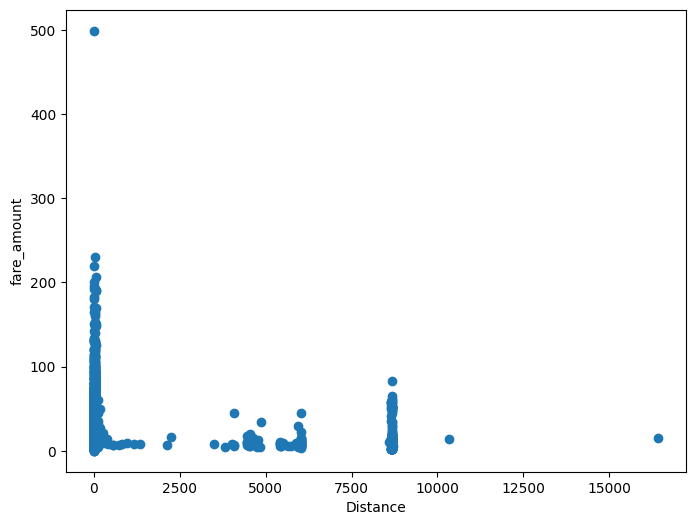

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(uber_fare_df_1['distance_travelled (KM)'],uber_fare_df_1['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [17]:
#let's put a threshold for distance above 50 km as not possible
uber_fare_df_1= uber_fare_df_1[uber_fare_df_1['distance_travelled (KM)']<=50]
print(f'After dropping the data, the final shape is {uber_fare_df_1.shape}')

After dropping the data, the final shape is (195209, 13)


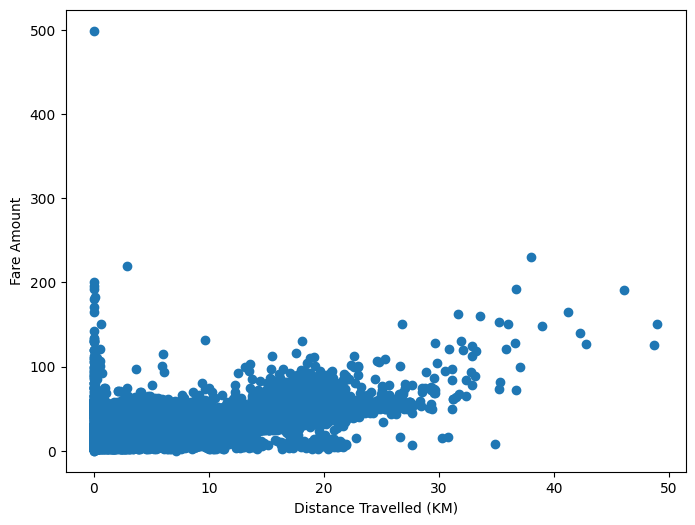

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(uber_fare_df_1['distance_travelled (KM)'],uber_fare_df_1['fare_amount'])
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Fare Amount')
plt.show()

In [19]:
uber_fare_df_1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timehour,pickup_month,pickup_year,distance_travelled (KM)
count,195209.000000,195209.000000,195209.000000,195209.000000,195209.000000,195209.000000,195209.000000,195209.000000,195209.000000,195209.000000
mean,11.347863,-73.908822,40.689697,-73.907851,40.688160,1.690107,13.491325,6.284321,2011.741221,3.316620
std,9.773993,2.710281,2.768826,2.710367,2.646280,1.306062,6.515514,3.439510,1.861764,3.594855
min,0.010000,-75.387785,-74.015515,-75.417737,-74.015750,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992269,40.736397,-73.991594,40.735279,1.000000,9.000000,3.000000,2010.000000,1.255272
50%,8.500000,-73.982104,40.753275,-73.980526,40.753723,1.000000,14.000000,6.000000,2012.000000,2.156107
75%,12.500000,-73.968331,40.767532,-73.965332,40.768317,2.000000,19.000000,9.000000,2013.000000,3.906828
max,499.000000,40.808425,401.066667,40.831932,45.031598,6.000000,23.000000,12.000000,2015.000000,49.003731


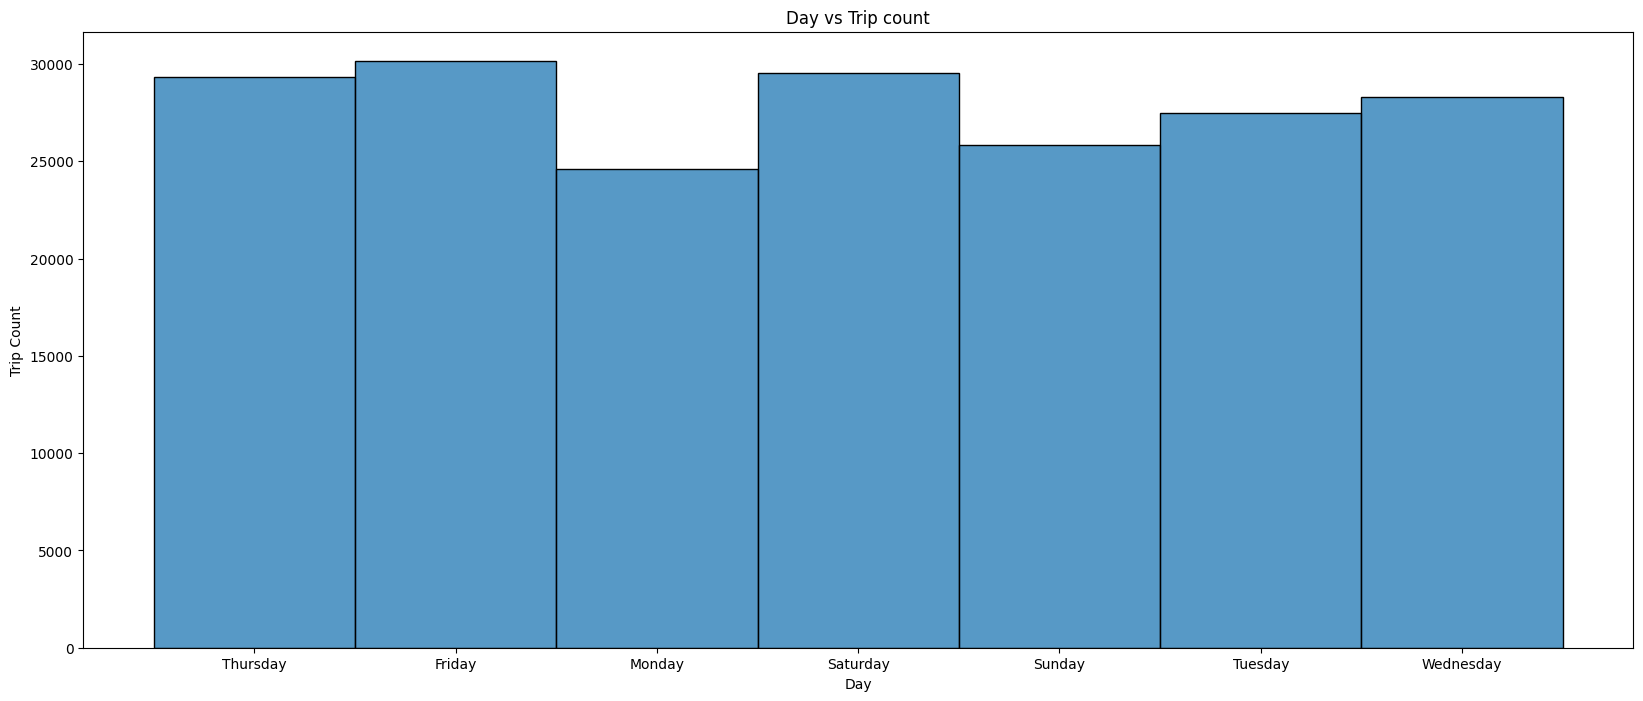

In [20]:
#study how much fare for each day in different parts of day
plt.figure(figsize=(20,8))
sb.histplot(uber_fare_df_1['Day'])
plt.ylabel('Trip Count')
plt.title('Day vs Trip count')
plt.show()

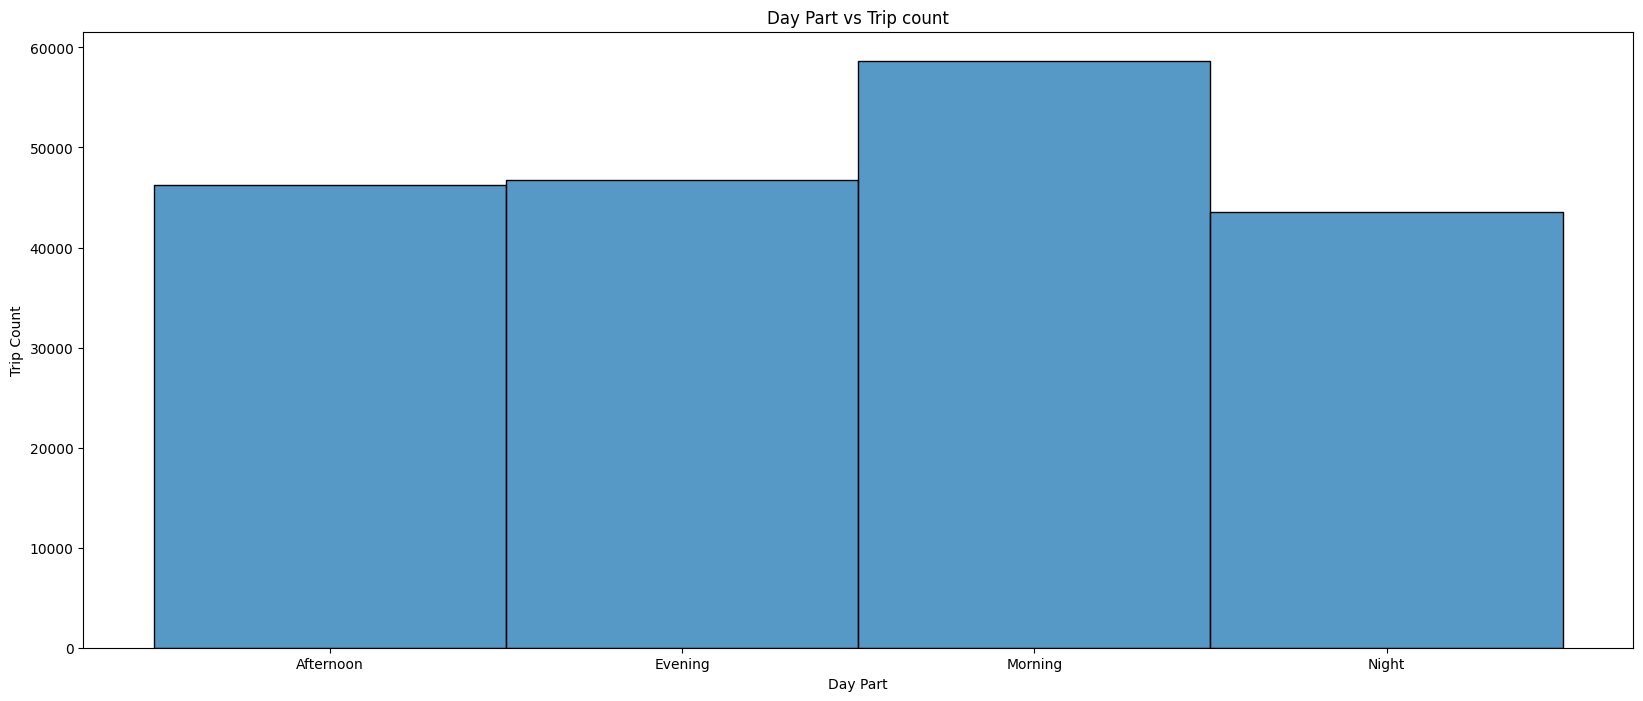

In [21]:
#study how much fare for each day in different parts of day
plt.figure(figsize=(20,8))
sb.histplot(uber_fare_df_1['Day Part'])
plt.ylabel('Trip Count')
plt.title('Day Part vs Trip count')
plt.show()

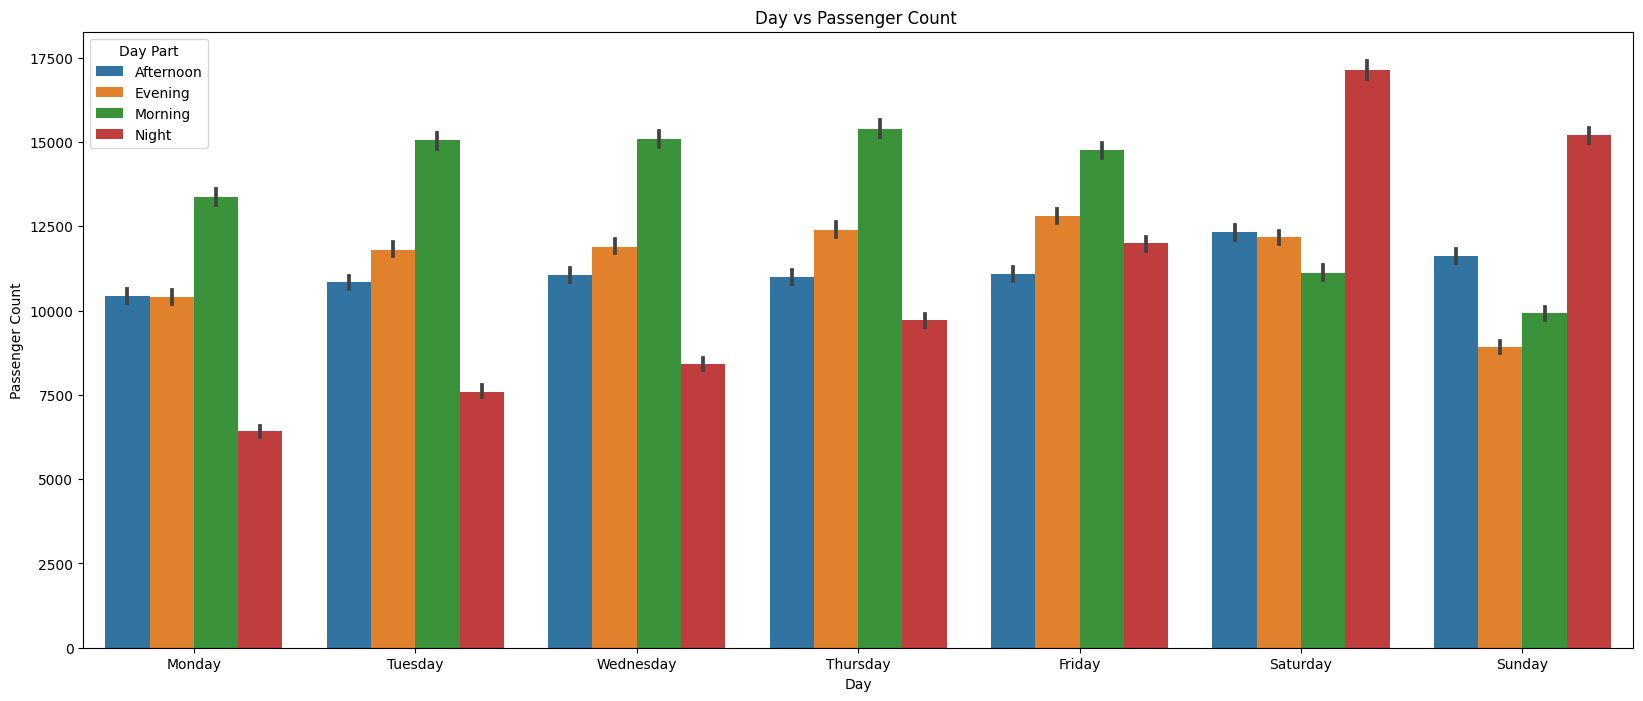

In [22]:
#study how much passenger (in mean) for each day in different parts of day
plt.figure(figsize=(20,8))
sb.barplot(x=uber_fare_df_1['Day'],y=uber_fare_df_1['passenger_count'],hue=uber_fare_df_1['Day Part'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],estimator=sum)
plt.ylabel('Passenger Count')
plt.title('Day vs Passenger Count ')
plt.show()

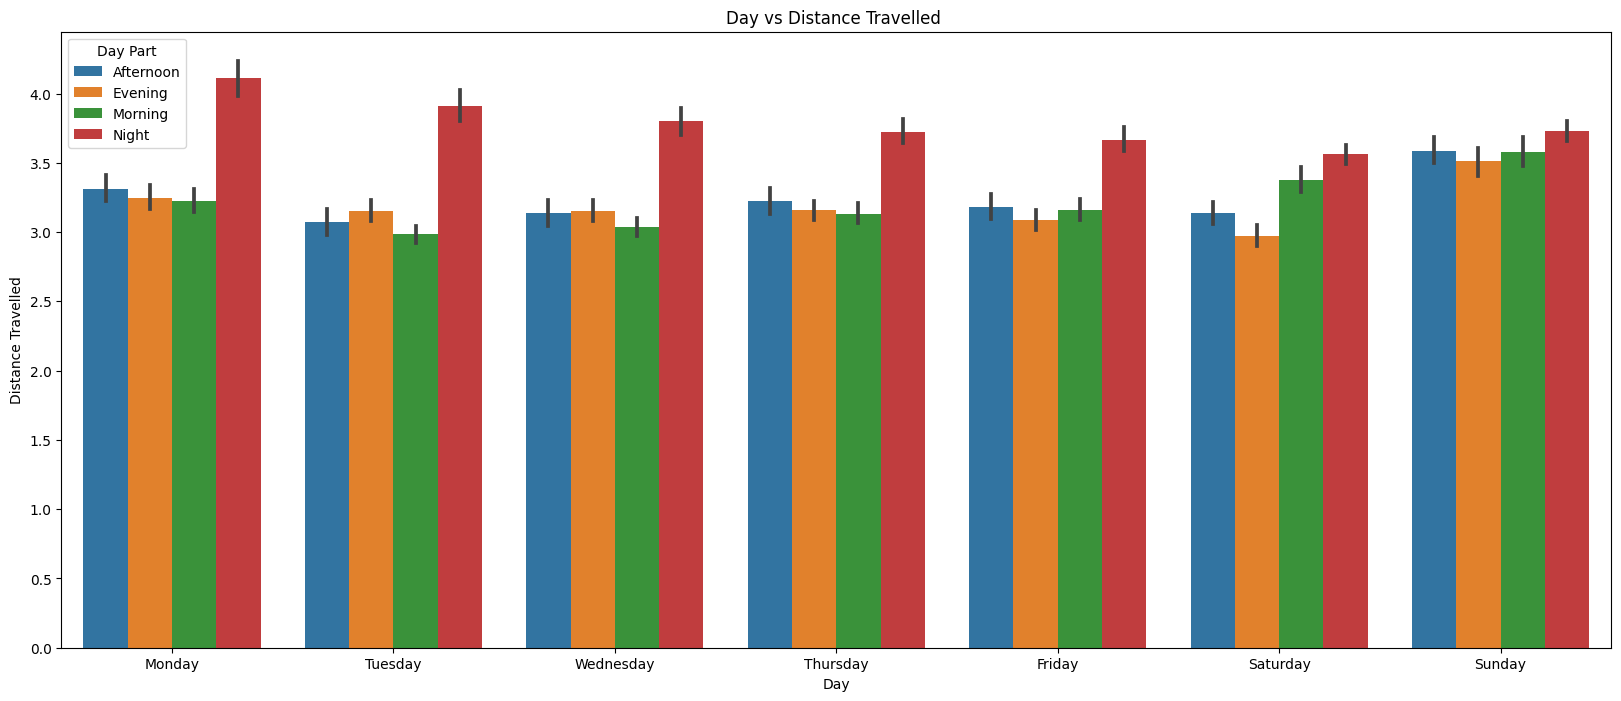

In [23]:
#study how much passenger (in mean) for each day in different parts of day
plt.figure(figsize=(20,8))
sb.barplot(x=uber_fare_df_1['Day'],y=uber_fare_df_1['distance_travelled (KM)'],hue=uber_fare_df_1['Day Part'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Distance Travelled')
plt.title('Day vs Distance Travelled ')
plt.show()

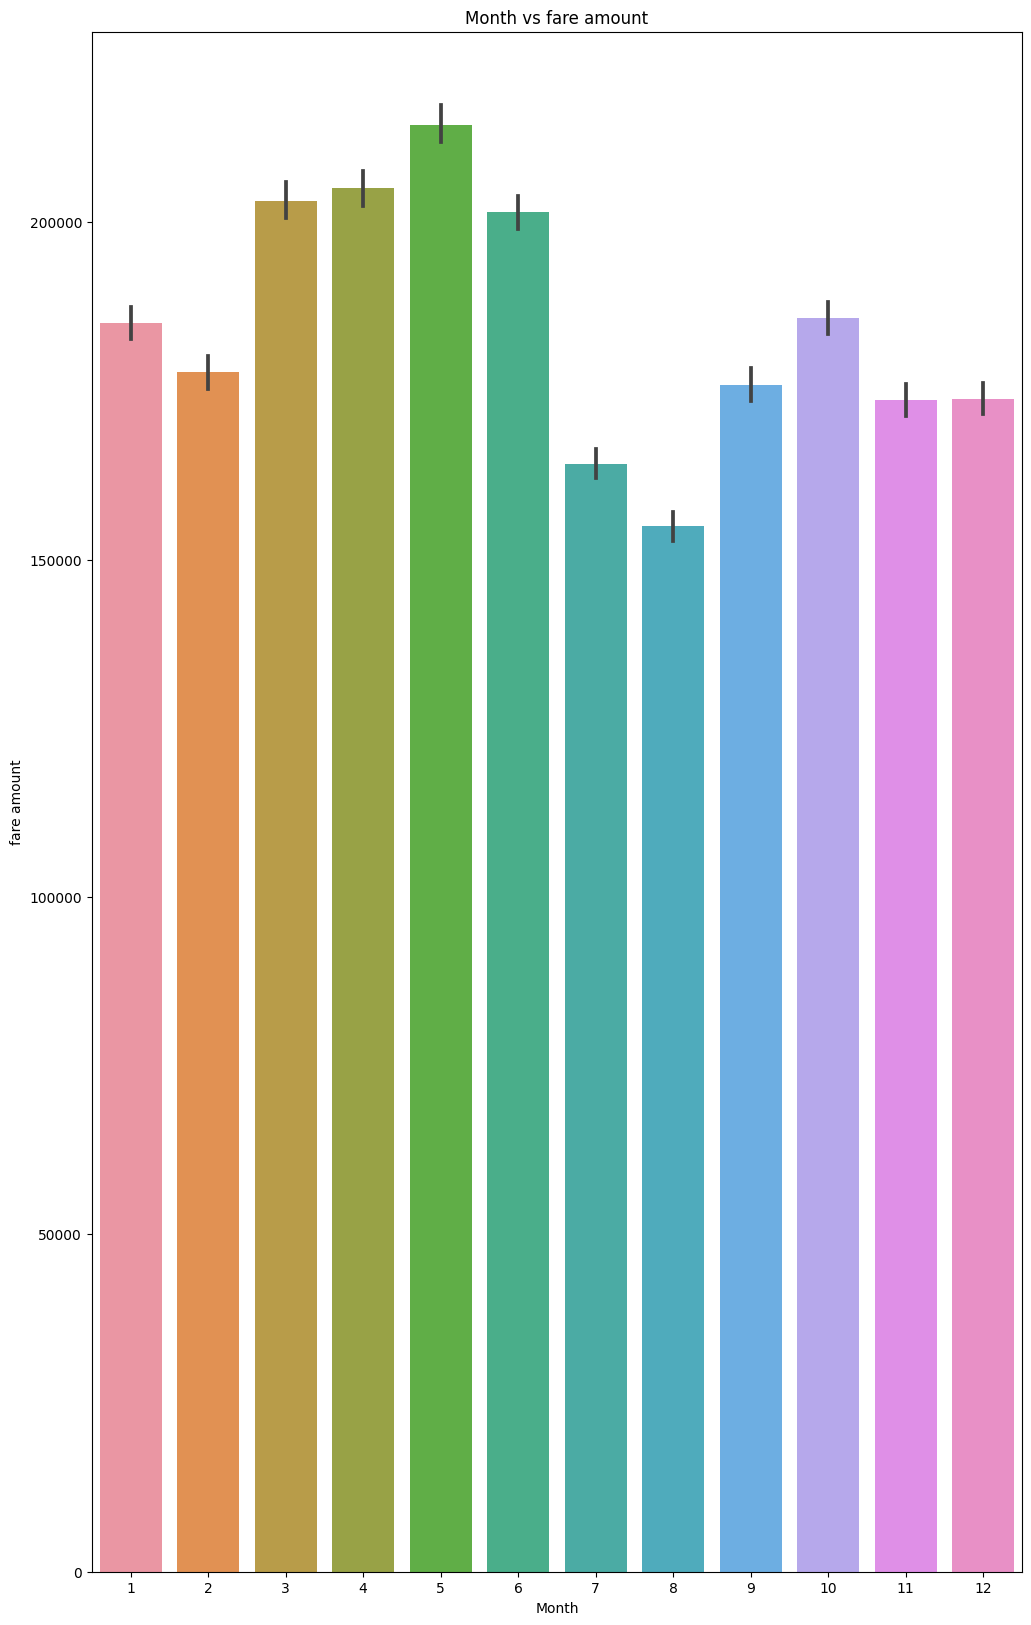

In [24]:
#month wise study
plt.figure(figsize=(12,20))
plt.title('Month vs fare amount')
sb.barplot(x=uber_fare_df_1['pickup_month'],y=uber_fare_df_1['fare_amount'],estimator=sum)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

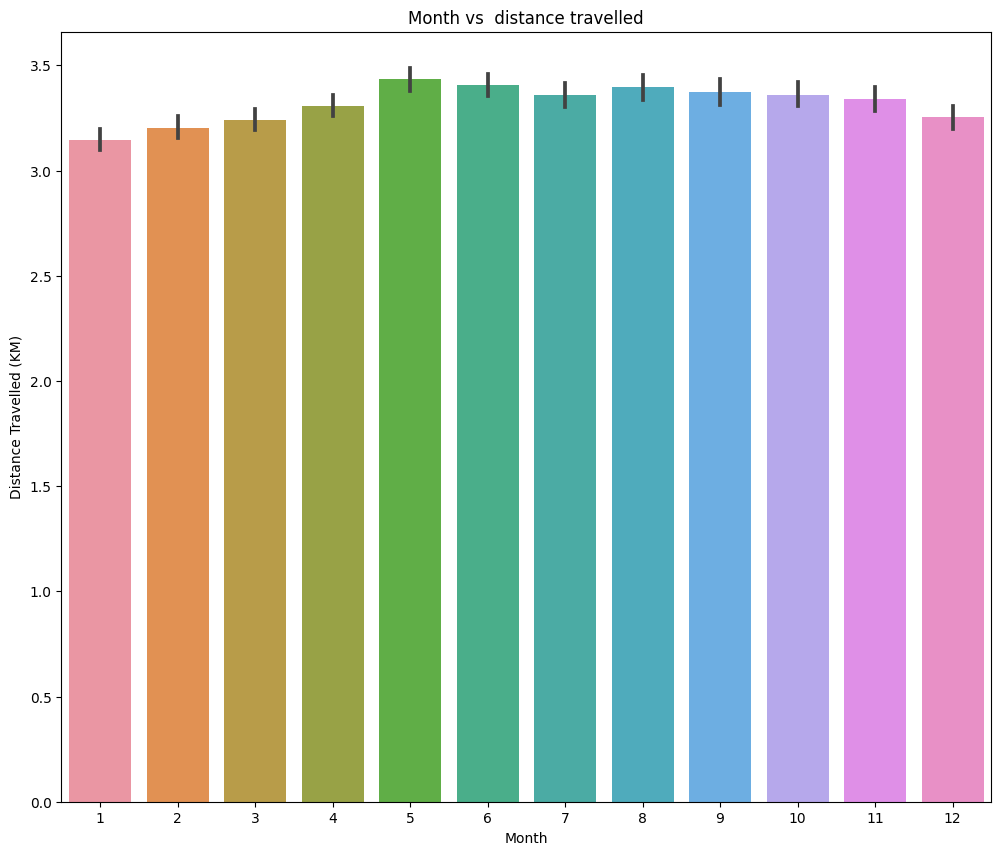

In [25]:
plt.figure(figsize=(12,10))
plt.title('Month vs  distance travelled')
sb.barplot(x=uber_fare_df_1['pickup_month'],y=uber_fare_df_1['distance_travelled (KM)'],estimator=np.mean)
plt.xlabel('Month')
plt.ylabel('Distance Travelled (KM)')
plt.show()

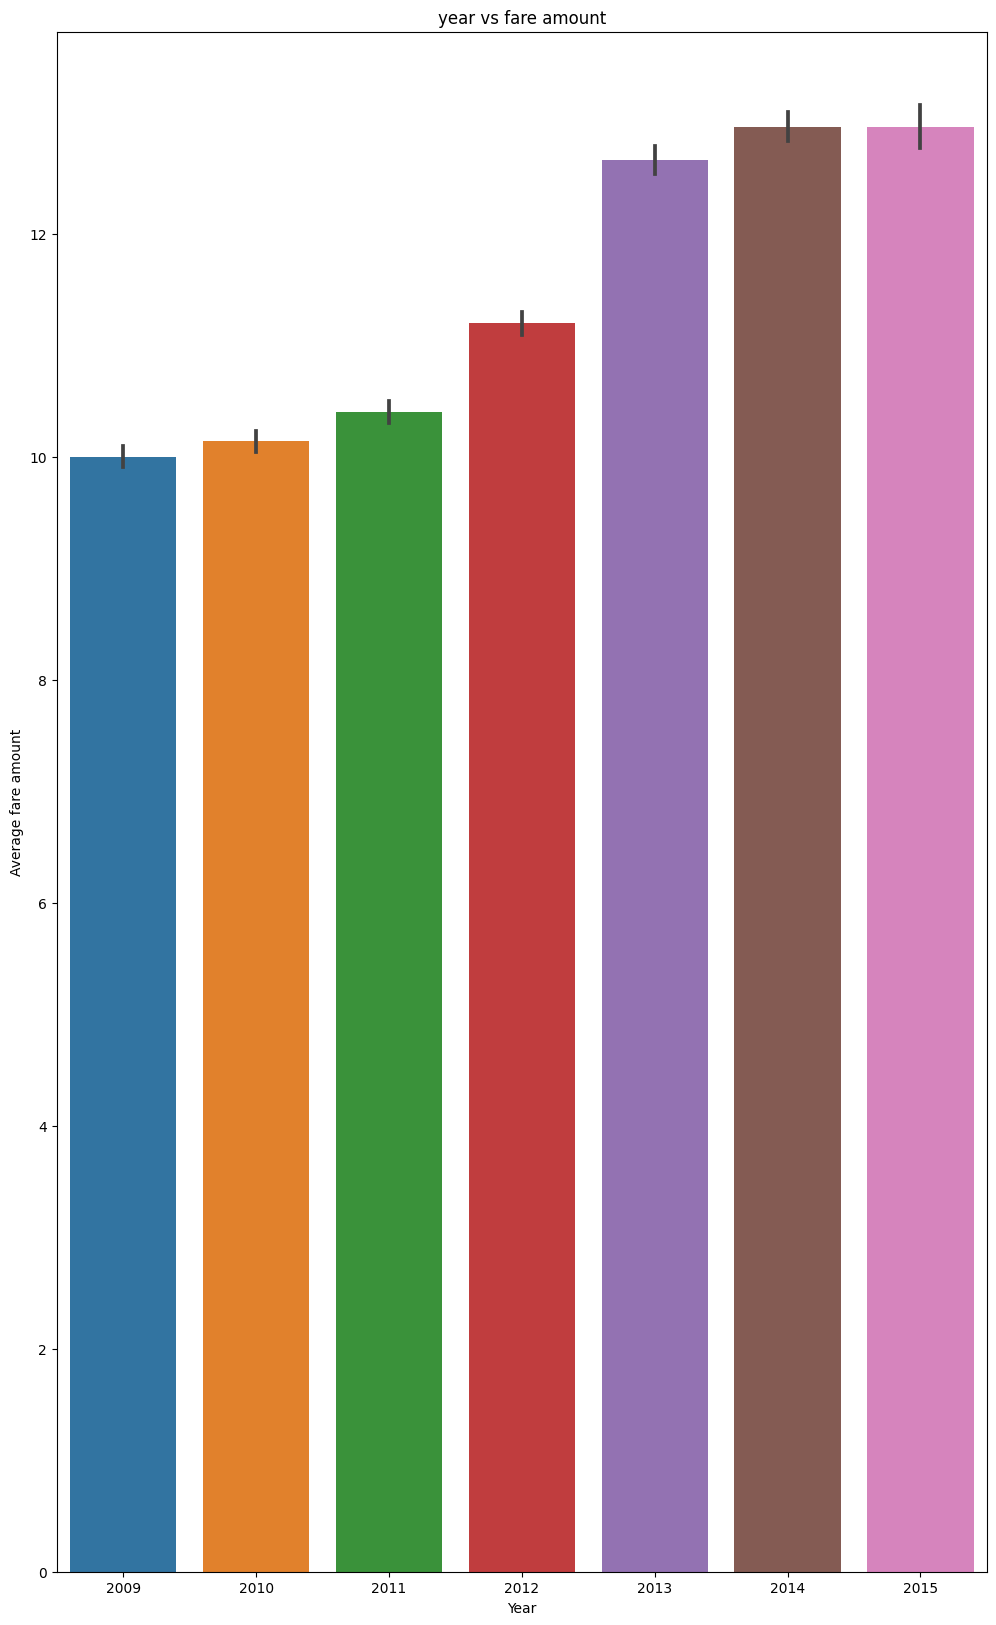

In [26]:
#year wise study
plt.figure(figsize=(12,20))
plt.title('year vs fare amount')
sb.barplot(x=uber_fare_df_1['pickup_year'],y=uber_fare_df_1['fare_amount'])
plt.xlabel('Year')
plt.ylabel('Average fare amount')
plt.show()

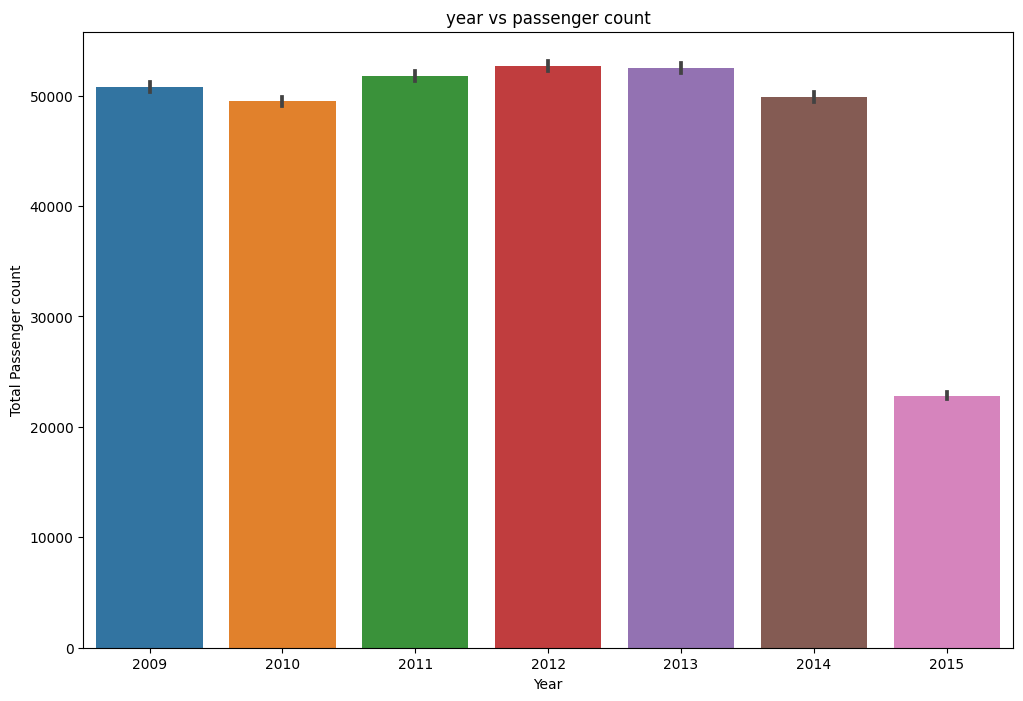

In [27]:
#year wise study
plt.figure(figsize=(12,8))
plt.title('year vs passenger count')
sb.barplot(x=uber_fare_df_1['pickup_year'],y=uber_fare_df_1['passenger_count'],estimator=sum)
plt.xlabel('Year')
plt.ylabel('Total Passenger count')
plt.show()

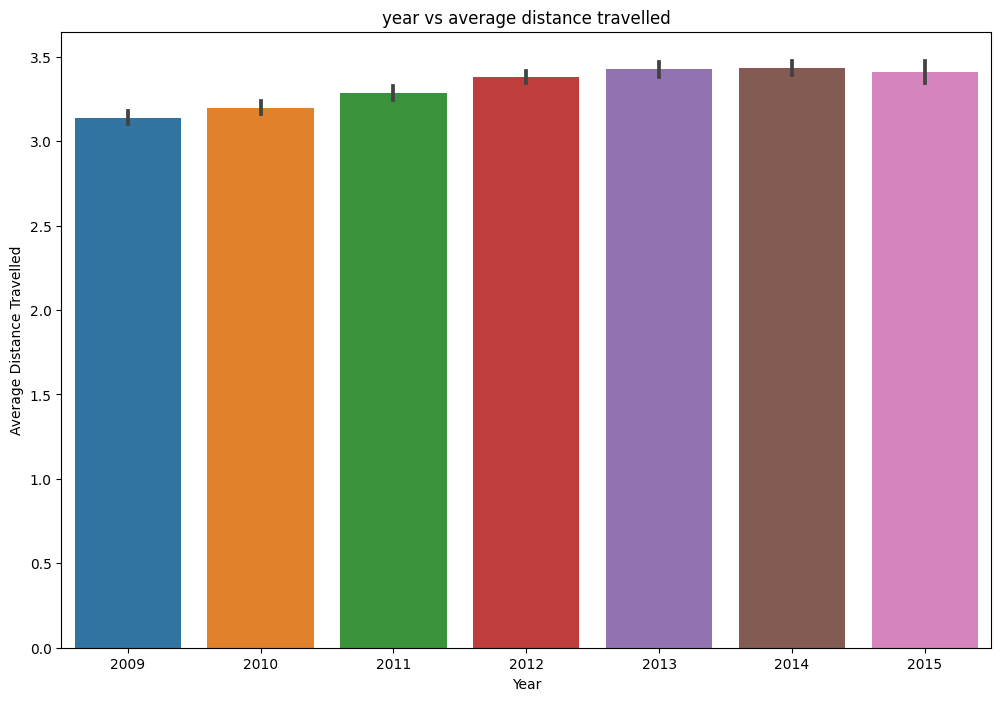

In [28]:
#year wise study
plt.figure(figsize=(12,8))
plt.title('year vs average distance travelled')
sb.barplot(x=uber_fare_df_1['pickup_year'],y=uber_fare_df_1['distance_travelled (KM)'])
plt.xlabel('Year')
plt.ylabel('Average Distance Travelled')
plt.show()

In [29]:
#Function to find the correlation
corr = uber_fare_df_1.corr()
corr

<ipython-input-29-e8f67ea81b98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = uber_fare_df_1.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timehour,pickup_month,pickup_year,distance_travelled (KM)
fare_amount,1.000000,0.011730,-0.008011,0.010302,-0.008014,0.010818,-0.021126,0.023711,0.118920,0.854728
pickup_longitude,0.011730,1.000000,-0.946681,0.999887,-0.990600,0.009581,0.002802,-0.007488,0.013408,0.004706
pickup_latitude,-0.008011,-0.946681,1.000000,-0.946678,0.955575,-0.009386,-0.002389,0.007687,-0.013909,0.003320
dropoff_longitude,0.010302,0.999887,-0.946678,1.000000,-0.990587,0.009576,0.001919,-0.007446,0.013298,0.003811
dropoff_latitude,-0.008014,-0.990600,0.955575,-0.990587,1.000000,-0.009410,-0.001619,0.008064,-0.014576,-0.001985
passenger_count,0.010818,0.009581,-0.009386,0.009576,-0.009410,1.000000,0.014719,0.008715,0.005797,0.008455
pickup_timehour,-0.021126,0.002802,-0.002389,0.001919,-0.001619,0.014719,1.000000,-0.004245,0.001992,-0.032366
pickup_month,0.023711,-0.007488,0.007687,-0.007446,0.008064,0.008715,-0.004245,1.000000,-0.115442,0.011709
pickup_year,0.118920,0.013408,-0.013909,0.013298,-0.014576,0.005797,0.001992,-0.115442,1.000000,0.029234
distance_travelled (KM),0.854728,0.004706,0.003320,0.003811,-0.001985,0.008455,-0.032366,0.011709,0.029234,1.000000


<ipython-input-30-5198f6808a1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uber_fare_df_1.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)


<Axes: >

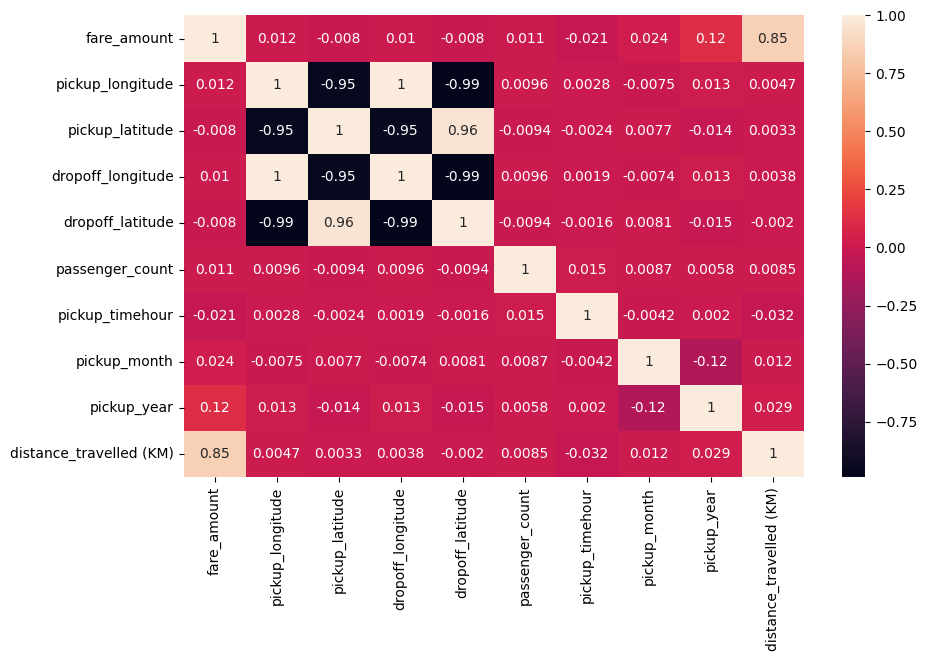

In [30]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(uber_fare_df_1.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

Feature modification & Feature selection

In [31]:
# uber_df_2= uber_fare_df_1.copy()

In [32]:
X= uber_fare_df_1.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_timehour','fare_amount'],axis=1)
y = uber_fare_df_1['fare_amount']

In [33]:
X= uber_fare_df_1.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_timehour','fare_amount'],axis=1)
y = uber_fare_df_1['fare_amount']
X_1=X.copy()

In [ ]:
def vif_creation(X):
    vif_df= pd.DataFrame()
    vif_df['Feature Name'] = X.columns
    vif_df['Vif Factor']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif_df

vif_df= vif_creation(X_1)
vif_df

,Feature Name,Vif Factor
0,passenger_count,2.683303
1,pickup_month,4.338310
2,pickup_year,15.469962
3,distance_travelled (KM),1.860976
4,Day_Monday,1.820472
5,Day_Saturday,1.989928
6,Day_Sunday,1.867957
7,Day_Thursday,1.973527
8,Day_Tuesday,1.914514
9,Day_Wednesday,1.940982


In [ ]:
X_1.drop(['pickup_year','pickup_month'],axis=1,inplace=True)
vif_df=vif_creation(X_1)
vif_df

,Feature Name,Vif Factor
0,passenger_count,2.321785
1,distance_travelled (KM),1.743921
2,Day_Monday,1.373170
3,Day_Saturday,1.476097
4,Day_Sunday,1.419891
5,Day_Thursday,1.455754
6,Day_Tuesday,1.416736
7,Day_Wednesday,1.431394
8,Day Part_Evening,1.656385
9,Day Part_Morning,1.805066


In [ ]:
X.skew(axis=0)

passenger_count             1.981063
pickup_month                0.108150
pickup_year                 0.061716
distance_travelled (KM)    16.526997
Day_Monday                  2.253274
Day_Saturday                1.945660
Day_Sunday                  2.170781
Day_Thursday                1.958067
Day_Tuesday                 2.066935
Day_Wednesday               2.017070
Day Part_Evening            1.221111
Day Part_Morning            0.870956
Day Part_Night              1.330133
dtype: float64

___

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [35]:
from sklearn.model_selection import train_test_split
#X_1=sm.add_constant(X_1)
X_train,X_test,y_train,y_test= train_test_split(X_1,y,test_size=0.3,random_state=100)
X_train['distance_travelled (KM)']=scaler.fit_transform(X_train['distance_travelled (KM)'].values.reshape(-1,1))
X_test['distance_travelled (KM)'] = scaler.transform(X_test['distance_travelled (KM)'].values.reshape(-1,1))

In [36]:
X_train.describe()

,passenger_count,pickup_month,pickup_year,distance_travelled (KM)
count,136646.000000,136646.000000,136646.000000,136646.000000
mean,1.690997,6.288029,2011.745847,0.068195
std,1.307087,3.441356,1.860770,0.073951
min,1.000000,1.000000,2009.000000,0.000000
25%,1.000000,3.000000,2010.000000,0.025808
50%,1.000000,6.000000,2012.000000,0.044332
75%,2.000000,9.000000,2013.000000,0.080301
max,6.000000,12.000000,2015.000000,1.000000


#Standardization

For more accurate results on our linear regression model

Assigning the dependent and independent variable

In [37]:
X = uber_fare_df_1['distance_travelled (KM)'].values.reshape(-1, 1)        #Independent Variable
y = uber_fare_df_1['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [38]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.3936848 ]
 [-0.37322228]
 [ 0.15880317]
 ...
 [ 2.00042975]
 [ 0.32250331]
 [ 0.28157828]]
[[-0.45434404]
 [-0.23896147]
 [ 0.47839537]
 ...
 [ 2.65204678]
 [ 0.06205993]
 [ 0.58449346]]


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

simple linear regression

In [40]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.7495038


Actual vs Predicted Values

In [ ]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}

from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))


Accuracy Checking
Finding the MSE,MAE, RMSE, etc.

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2479472187951637
Mean Squared Error: 0.24604492543779535
Root Mean Squared Error: 0.49602915785041846


Intercept and Co-efficient

In [43]:
print(l_reg.intercept_)
print(l_reg.coef_)

[-2.61492955e-05]
[[0.85329361]]


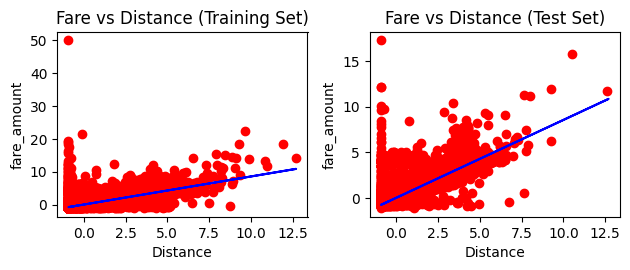

In [44]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()

In [45]:
print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.7495038


# Linear Regression Model

In [ ]:
##model building
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f'The train accurcay of linear regression model is {lr_model.score(X_train,y_train)} and test score is {lr_model.score(X_test,y_test)}')

The train accurcay of linear regression model is 0.7259255195353187 and test score is 0.7495038030034196


In [ ]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.7495038


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = uber_fare_df_1['distance_travelled (KM)'].values.reshape(-1, 1)
y = uber_fare_df_1['fare_amount'].values.reshape(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = RandomForestRegressor()

# 탐색할 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 의사 결정 트리의 개수
    'max_depth': [None, 5, 10],  # 의사 결정 트리의 최대 깊이
    'min_samples_split': [2, 5, 10]  # 내부 노드를 분할하기 위한 최소 샘플 수
}

# GridSearchCV를 사용하여 파라미터 그리드 탐색
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=2)
grid_search.fit(X_train, y_train)

# 최적의 모델과 파라미터 출력
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X = uber_fare_df_1['distance_travelled (KM)'].values.reshape(-1, 1)
y = uber_fare_df_1['fare_amount'].values.reshape(-1, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = RandomForestRegressor()

# 탐색할 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],  # 의사 결정 트리의 개수
    'max_depth': [None, 5],  # 의사 결정 트리의 최대 깊이
    'min_samples_split': [2, 5]  # 내부 노드를 분할하기 위한 최소 샘플 수
}

# GridSearchCV를 사용하여 파라미터 그리드 탐색
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# 최적의 모델과 파라미터 출력
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 28.903319986189512
Mean Absolute Error: 2.411841868645587


# DT

In [1]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

In [ ]:
y_pred_DT=decision_tree_model.predict(X_test)

In [ ]:
y_pred_DT

# RF